In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
warnings.filterwarnings('ignore')
import matplotlib.cm as cm

In [2]:
 # Load the dataset
file_path = "fashion.csv"  
df = pd.read_csv(file_path)


In [3]:
#first five values of the dataset
df.head()

product_id    product_name  gender category     pattern  color age_group  \
0        1001    Biker Jacket    Male    Shirt   Geometric  White     25-35   
1        1002  Business Shirt    Male   Jacket  Polka Dots  Beige     18-24   
2        1003     Wool Jacket  Female    Dress   Geometric  Brown     18-24   
3        1004    Summer Dress    Male   Shorts       Plain  White     25-35   
4        1005    Casual Jeans    Male    Shirt       Plain  Beige     35-45   

   season   price   material  sales_count  reviews_count  average_rating  \
0  Spring   70.36  Synthetic           75             65             4.9   
1  Summer   91.59       Wool          296             25             3.5   
2     All  129.52       Wool           50             32             4.3   
3     All  116.01     Cotton          435             73             4.6   
4  Winter  125.48    Viscose           79             36             3.6   

   out_of_stock_times brand discount last_stock_date  wish_list_count  \
0                   3  ZARA      20%      28-01-2018              211   
1                   6  ZARA       0%      28-01-2018              211   
2                   4  ZARA       5%      07-01-2018               64   
3                   3  ZARA      10%      01-01-2018              171   
4                   4  ZARA       0%      28-01-2018              126   

   month_of_sale  year_of_sale  
0              1          2018  
1              1          2018  
2              1          2018  
3              1          2018  
4              1          2018

In [4]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          660 non-null    int64  
 1   product_name        660 non-null    object 
 2   gender              660 non-null    object 
 3   category            660 non-null    object 
 4   pattern             660 non-null    object 
 5   color               660 non-null    object 
 6   age_group           660 non-null    object 
 7   season              660 non-null    object 
 8   price               660 non-null    float64
 9   material            660 non-null    object 
 10  sales_count         660 non-null    int64  
 11  reviews_count       660 non-null    int64  
 12  average_rating      660 non-null    float64
 13  out_of_stock_times  660 non-null    int64  
 14  brand               660 non-null    object 
 15  discount            660 non-null    object 
 16  last_sto

In [6]:
#Checking values in the dataset
df.isnull().sum()

product_id            0
product_name          0
gender                0
category              0
pattern               0
color                 0
age_group             0
season                0
price                 0
material              0
sales_count           0
reviews_count         0
average_rating        0
out_of_stock_times    0
brand                 0
discount              0
last_stock_date       0
wish_list_count       0
month_of_sale         0
year_of_sale          0
dtype: int64

In [7]:

#categorising numerical and categorical values
numerical_columns = ['price', 'sales_count', 'reviews_count', 'average_rating', 'out_of_stock_times', 'wish_list_count', 'month_of_sale', 'year_of_sale']
categorical_columns = ['product_id', 'product_name', 'gender', 'category', 'pattern', 'color', 'age_group', 'season', 'material', 'brand', 'discount', 'last_stock_date']

df_numerical = df[numerical_columns]
df_categorical = df[categorical_columns]

In [12]:

#Adding more rows to the dataset using gaussian noise method
def generate_synthetic_data(df, num_samples):
    # Adding Gaussian noise to numerical columns
    synthetic_data = pd.DataFrame()
    for col in df.columns:
        if col in numerical_columns:
            noise = np.random.normal(0, 0.1 * df[col].std(), size=num_samples)
            synthetic_col_data = np.random.choice(df[col], size=num_samples) + noise
            synthetic_data[col] = synthetic_col_data
    return synthetic_data

# Determining the number of synthetic rows needed
additional_samples_needed = 1500 - len(df)

# Generating synthetic numerical data
synthetic_numerical_data = generate_synthetic_data(df_numerical, additional_samples_needed)

def sample_categorical_data(df, num_samples):
    # Randomly sampling from the existing categorical data
    synthetic_data = df.sample(n=num_samples, replace=True, random_state=42).reset_index(drop=True)
    return synthetic_data

# Generating synthetic categorical data
synthetic_categorical_data = sample_categorical_data(df_categorical, additional_samples_needed)

# Combining the synthetic numerical and categorical data
synthetic_data = pd.concat([synthetic_categorical_data, synthetic_numerical_data], axis=1)

# Combining the original and synthetic data
df = pd.concat([df, synthetic_data], ignore_index=True)

print(df.shape) 



(1500, 20)


In [13]:
#Checking again the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          1500 non-null   int64  
 1   product_name        1500 non-null   object 
 2   gender              1500 non-null   object 
 3   category            1500 non-null   object 
 4   pattern             1500 non-null   object 
 5   color               1500 non-null   object 
 6   age_group           1500 non-null   object 
 7   season              1500 non-null   object 
 8   price               1500 non-null   float64
 9   material            1500 non-null   object 
 10  sales_count         1500 non-null   float64
 11  reviews_count       1500 non-null   float64
 12  average_rating      1500 non-null   float64
 13  out_of_stock_times  1500 non-null   float64
 14  brand               1500 non-null   object 
 15  discount            1500 non-null   object 
 16  last_s

In [14]:
#descriptive statistics
df.describe()

product_id        price  sales_count  reviews_count  average_rating  \
count  1500.000000  1500.000000  1500.000000    1500.000000     1500.000000   
mean   1325.178667    85.653813   270.545936      61.690258        4.033838   
std     192.455906    37.712714   130.931455      23.519298        0.562488   
min    1001.000000    15.863874    15.937428      17.984845        2.902556   
25%    1155.750000    53.949915   159.000000      41.348716        3.600000   
50%    1326.000000    84.309442   264.000000      61.523919        4.061720   
75%    1491.250000   117.765821   379.761803      82.000000        4.500000   
max    1660.000000   155.779680   534.930025     103.939673        5.132087   

       out_of_stock_times  wish_list_count  month_of_sale  year_of_sale  
count         1500.000000      1500.000000    1500.000000   1500.000000  
mean             3.555836       152.718579       6.535975   2020.006568  
std              1.719639        57.210962       3.494603      1.428547  
min              0.462179        43.024561       0.178046   2017.644573  
25%              2.000000       101.927444       3.466620   2018.978884  
50%              3.787246       152.519655       6.406867   2020.000000  
75%              5.000000       203.593016       9.689445   2021.023096  
max              6.375154       256.797007      12.879401   2022.636668

In [18]:
# Creating new features
df['total_reviews'] = df['reviews_count'] * df['average_rating']
df['discount_percentage'] = df['discount'].str.replace('%', '').astype(float) / 100
df['price_discount_ratio'] = df['price'] * (1 - df['discount_percentage'])
df['stock_availability'] = df['out_of_stock_times'] / (df['sales_count'] + 1)
df['age_season_group'] = df['age_group'] + '_' + df['season']
df['product_popularity'] = df['sales_count'] + df['wish_list_count'] + df['total_reviews']

# Defining the threshold and create the target variable
sales_threshold = df['sales_count'].mean()
df['is_trend'] = (df['sales_count'] > sales_threshold).astype(int)

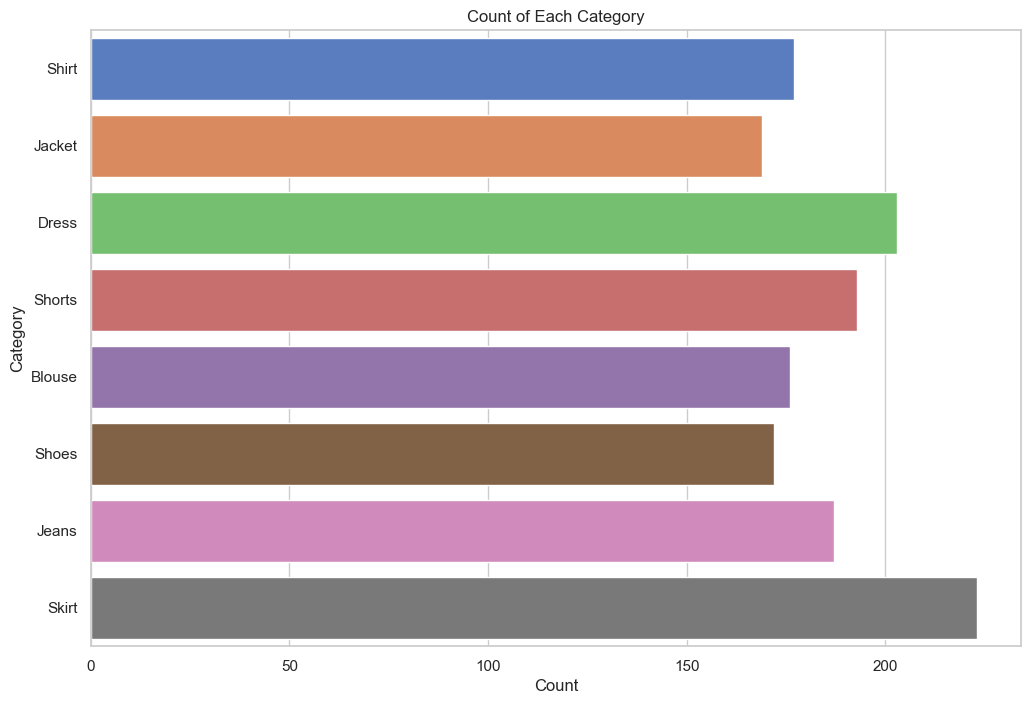

In [66]:
# Count plot for categories
plt.figure(figsize=(12, 8))
sns.countplot(y='category', data=df, palette='muted')
plt.title('Count of Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


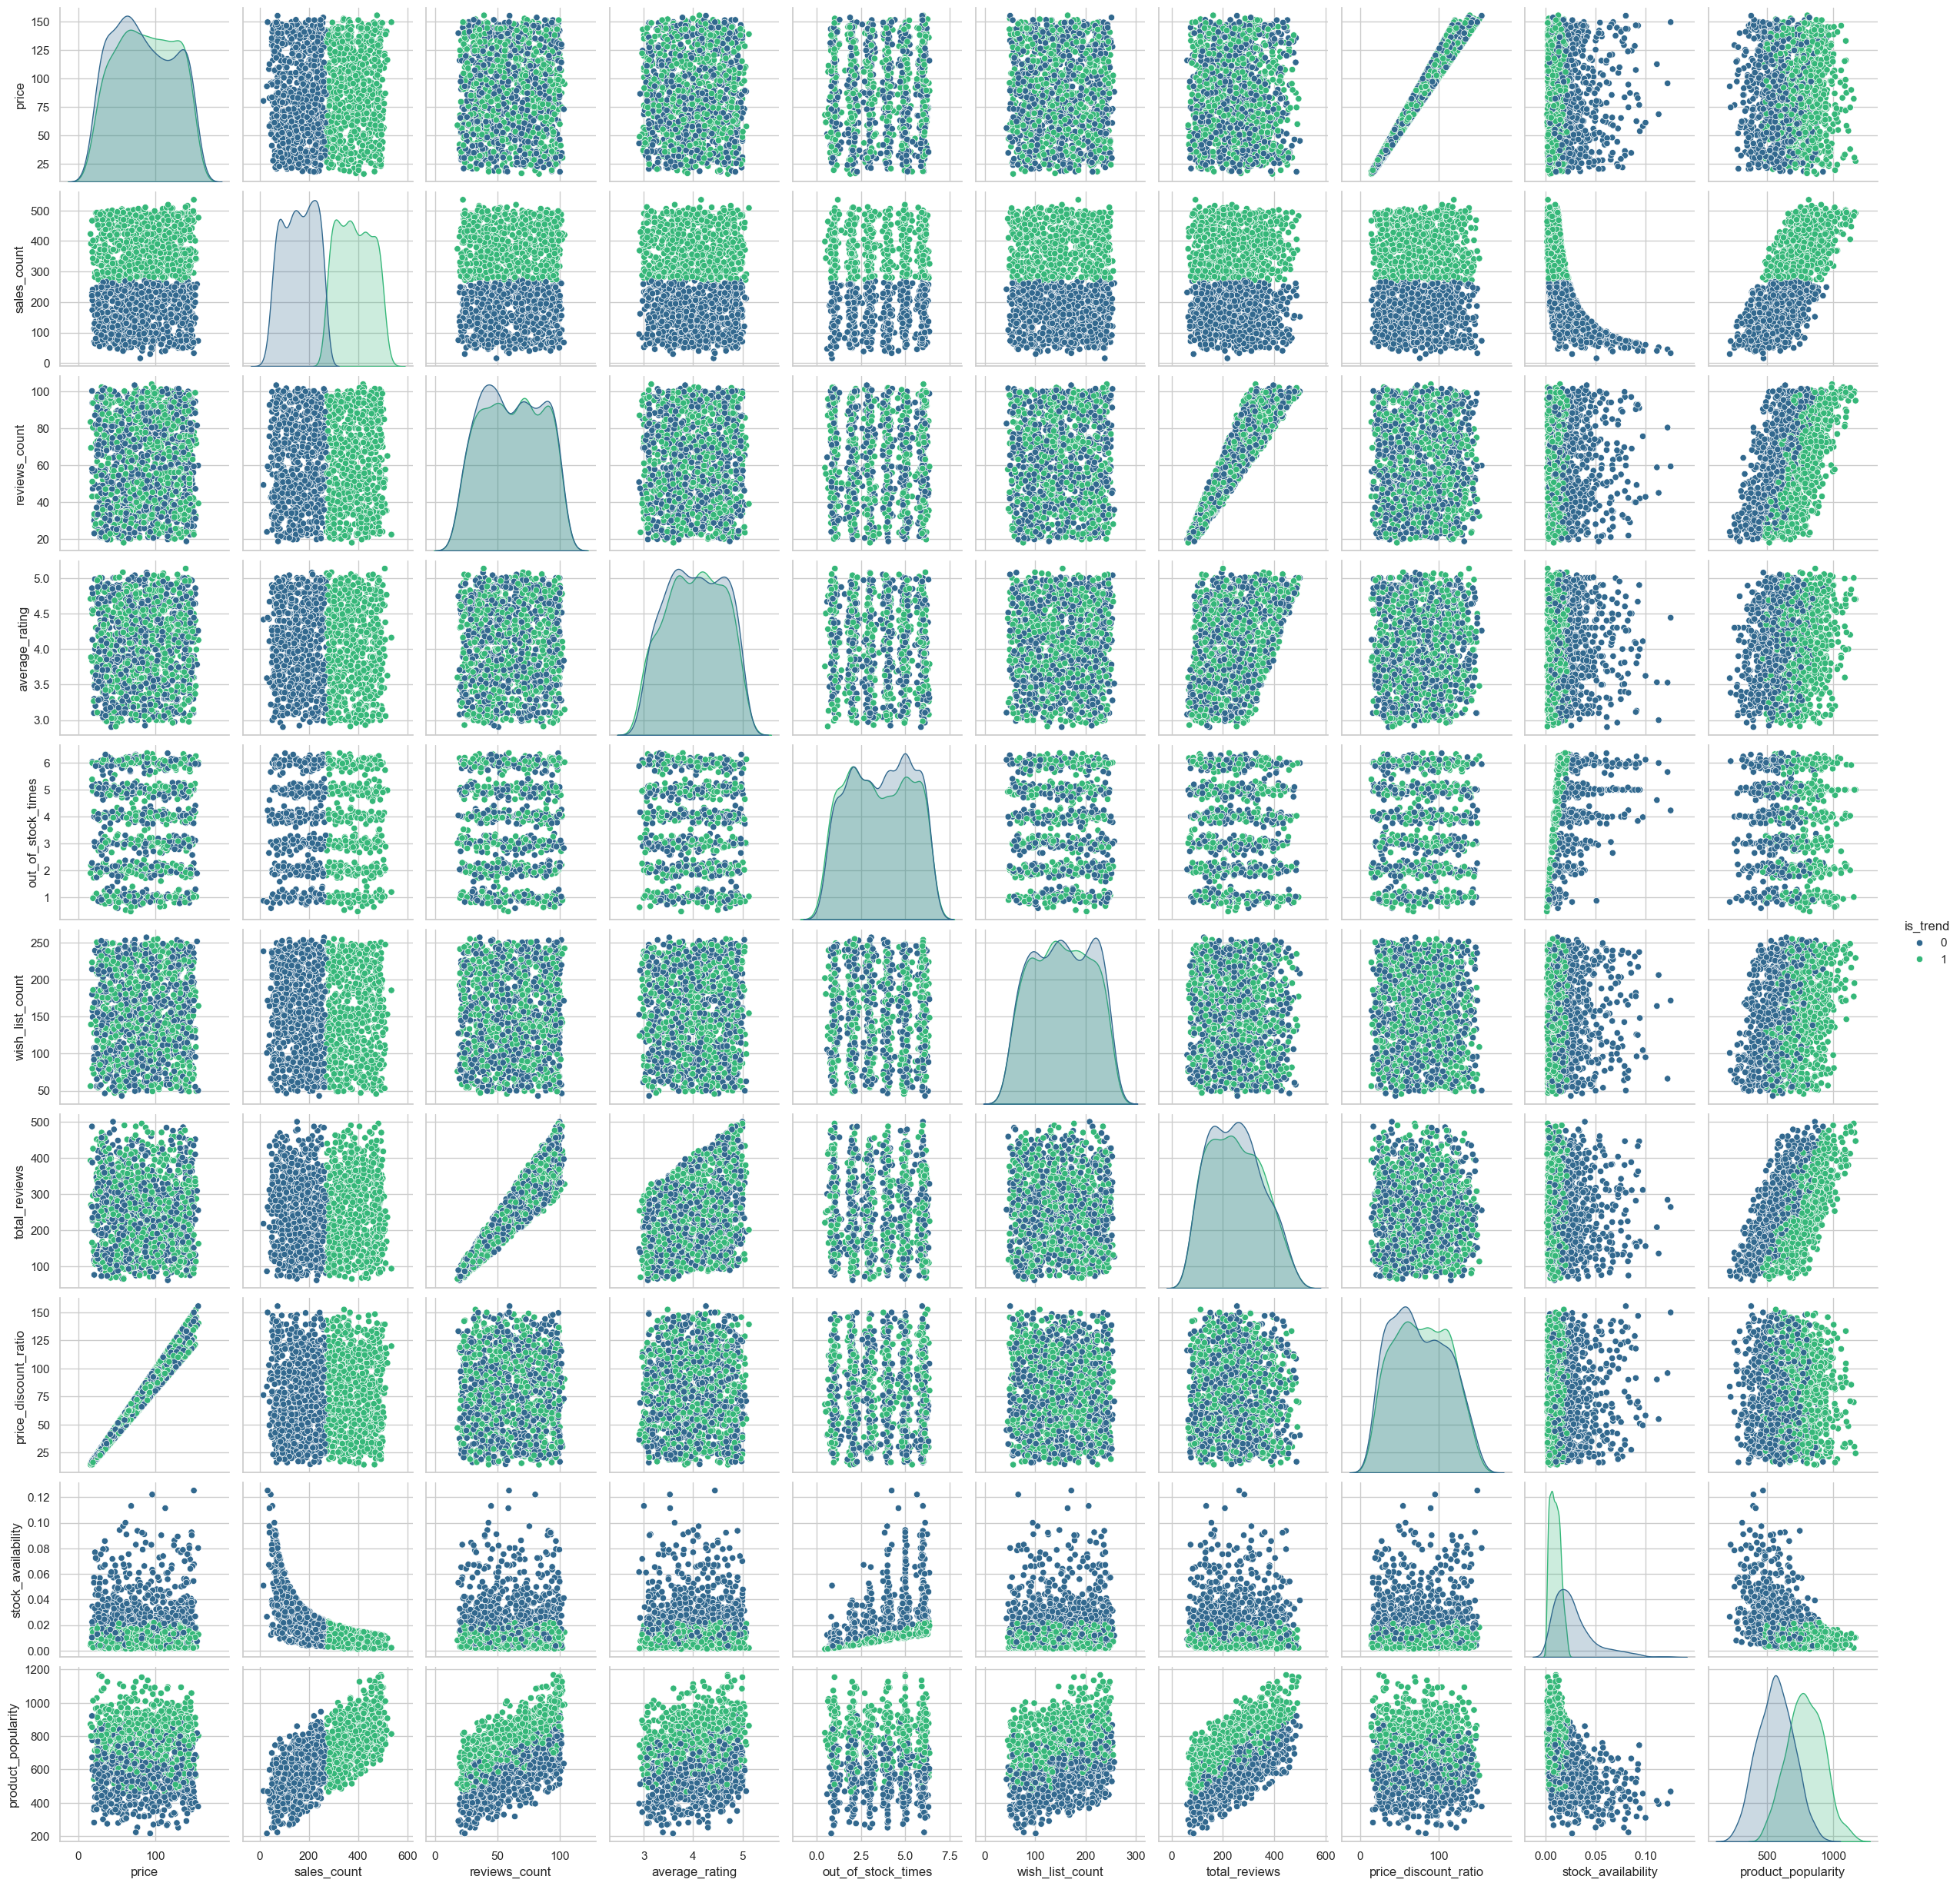

In [32]:

# Pair plot for numerical features
sns.pairplot(df[numerical_features + ['is_trend']], hue='is_trend', palette='viridis')
plt.show()


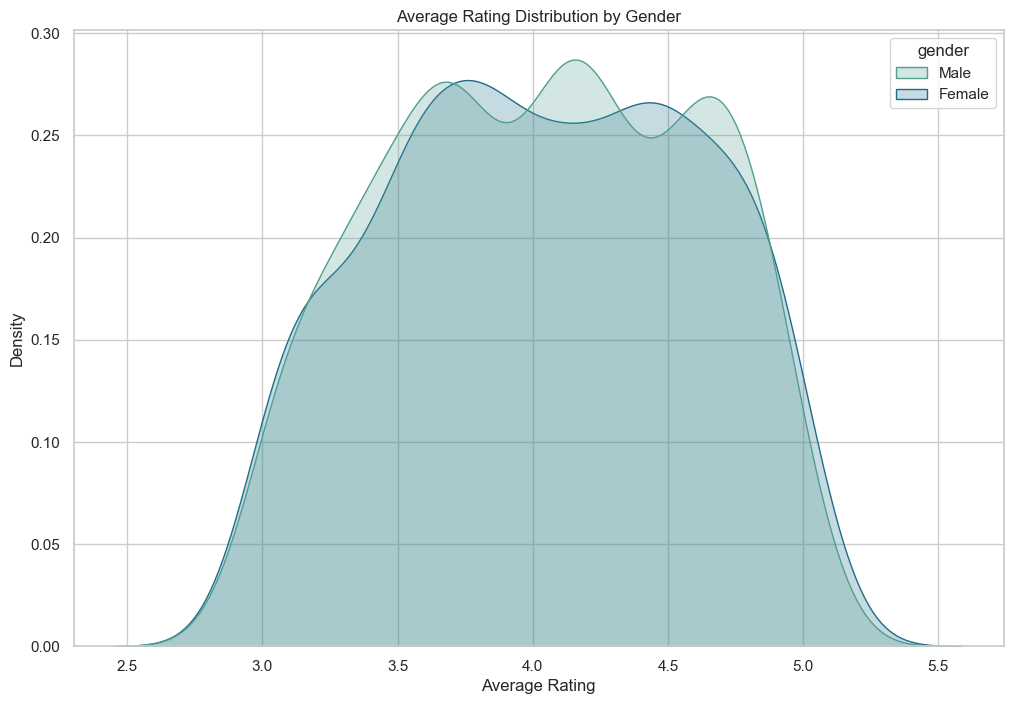

In [80]:

# Plot KDE for 'average_rating' based on 'gender'
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='average_rating', hue='gender', fill=True, palette='crest')
plt.title('Average Rating Distribution by Gender')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.show()



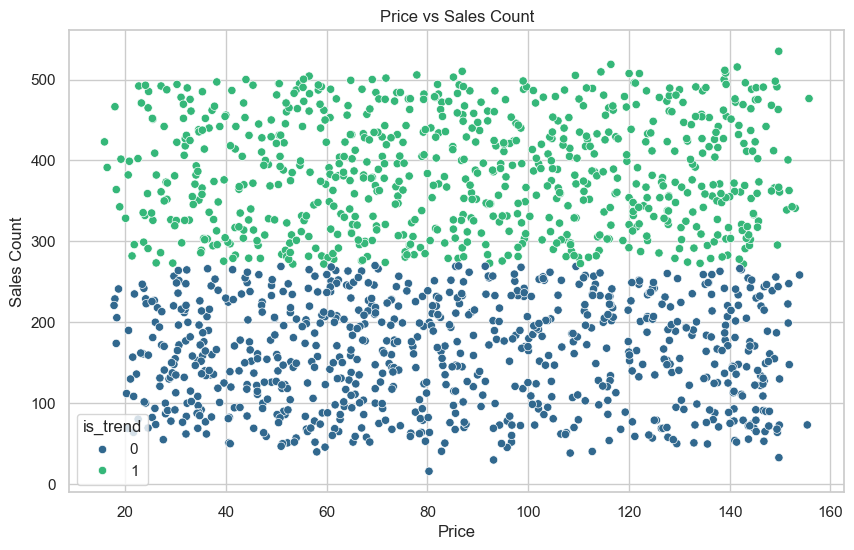

In [72]:
# Scatter plot between price and sales_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sales_count', hue='is_trend', data=df, palette='viridis')
plt.title('Price vs Sales Count')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.show()



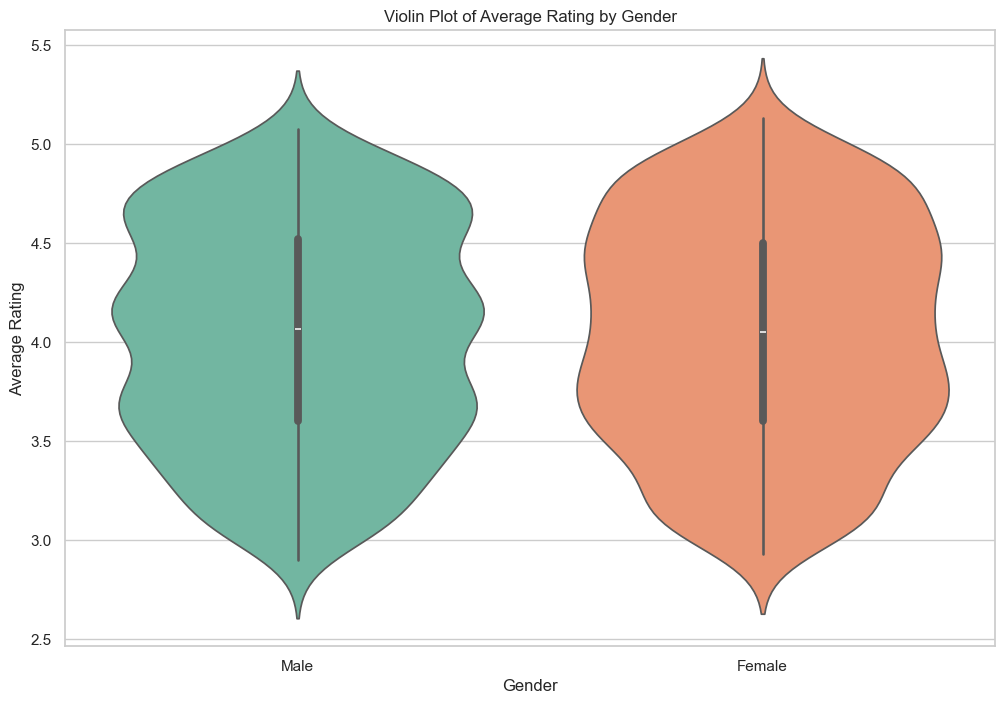

In [52]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='gender', y='average_rating', data=df, palette='Set2')
plt.title('Violin Plot of Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()



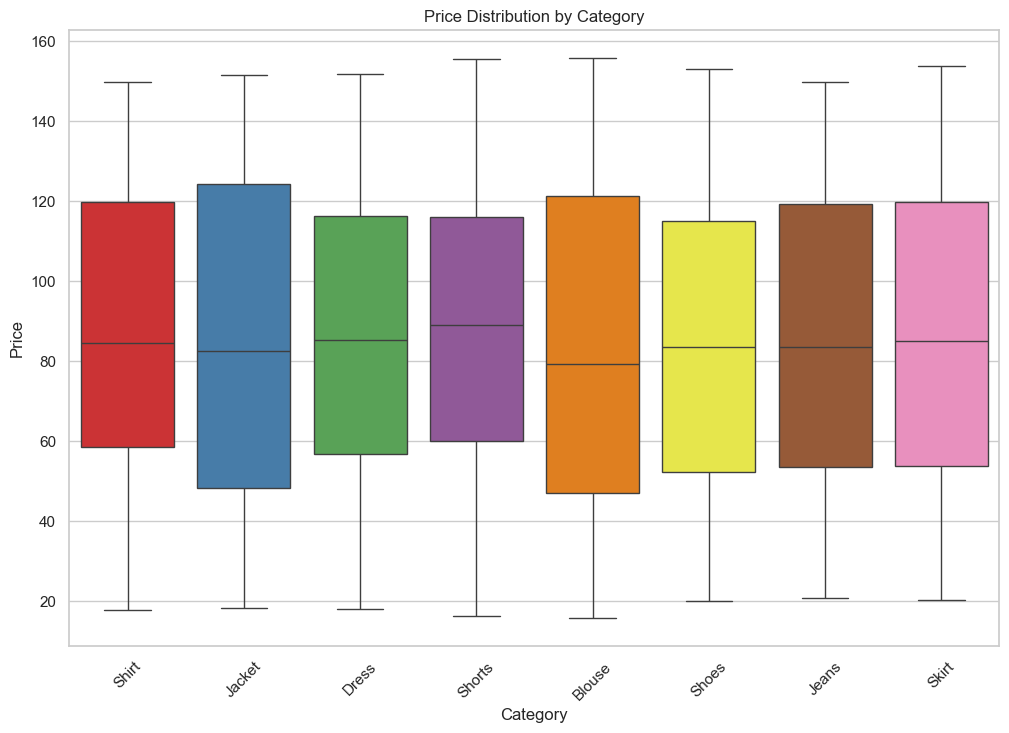

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for price by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='price', data=df, palette='Set1')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()


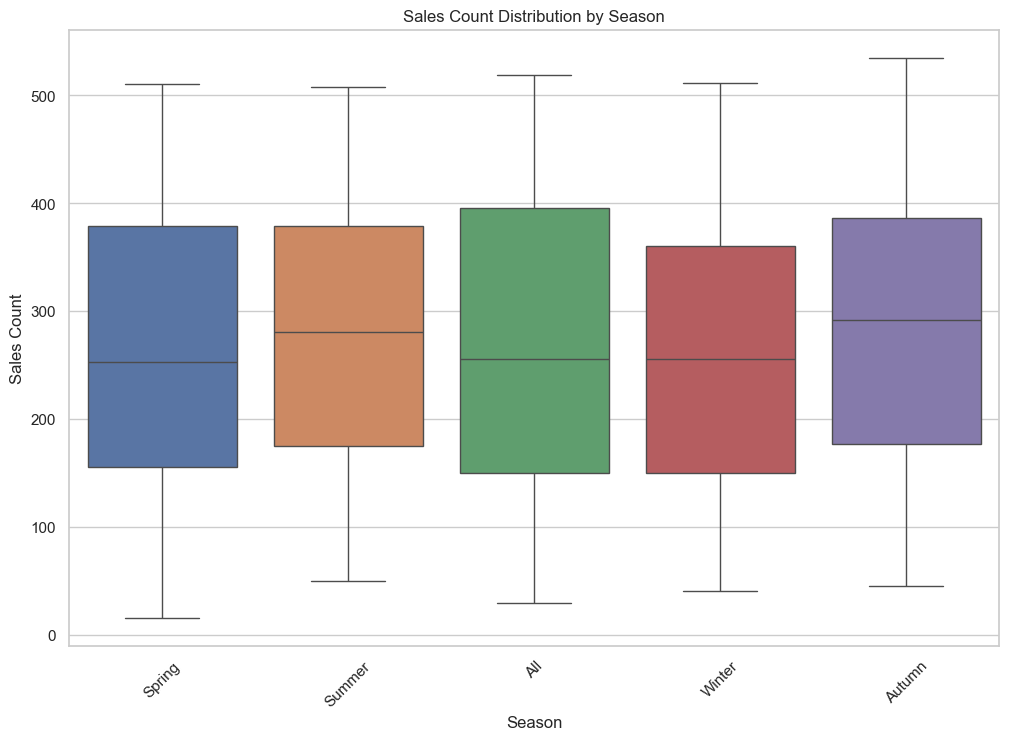

In [54]:
# Box plot of sales_count by season
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='sales_count', data=df, palette='deep')
plt.title('Sales Count Distribution by Season')
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Sales Count')
plt.show()


<Figure size 1200x800 with 0 Axes>

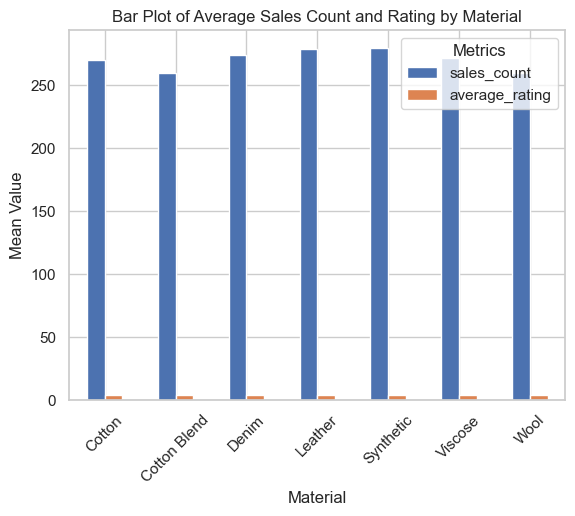

In [74]:
df_grouped = df.groupby('material')[['sales_count', 'average_rating']].mean().reset_index()

plt.figure(figsize=(12, 8))
df_grouped.plot(x='material', kind='bar', stacked=False)
plt.title('Bar Plot of Average Sales Count and Rating by Material')
plt.xlabel('Material')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()


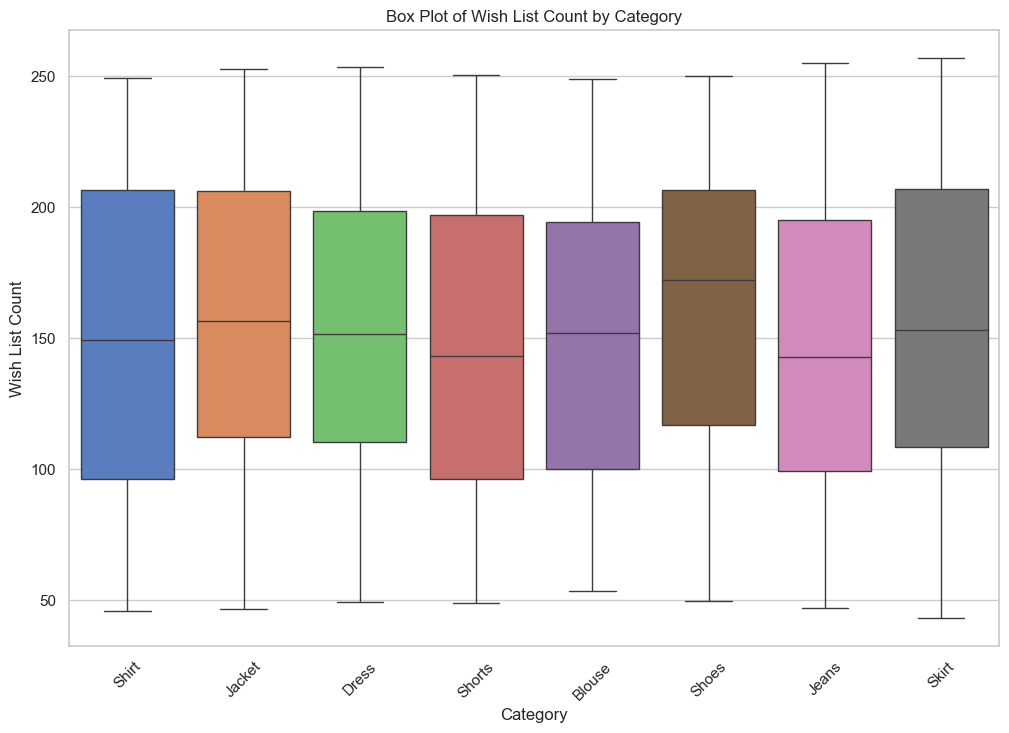

In [61]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='wish_list_count', data=df, palette='muted')
plt.title('Box Plot of Wish List Count by Category')
plt.xlabel('Category')
plt.ylabel('Wish List Count')
plt.xticks(rotation=45)
plt.show()


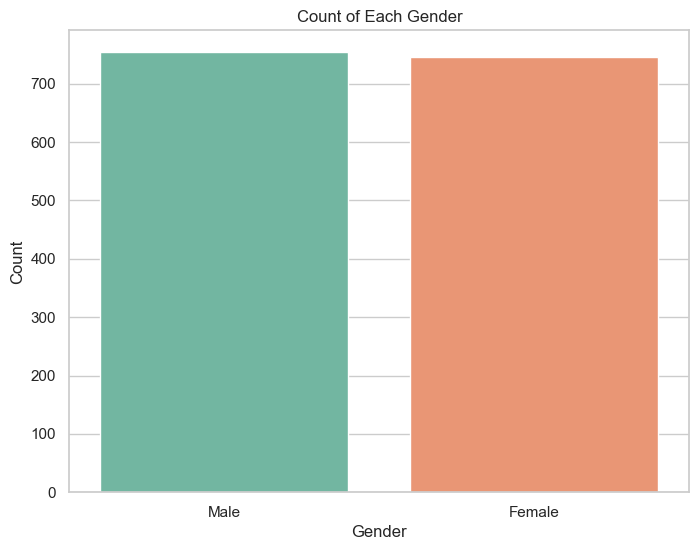

In [75]:
# Count plot for gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


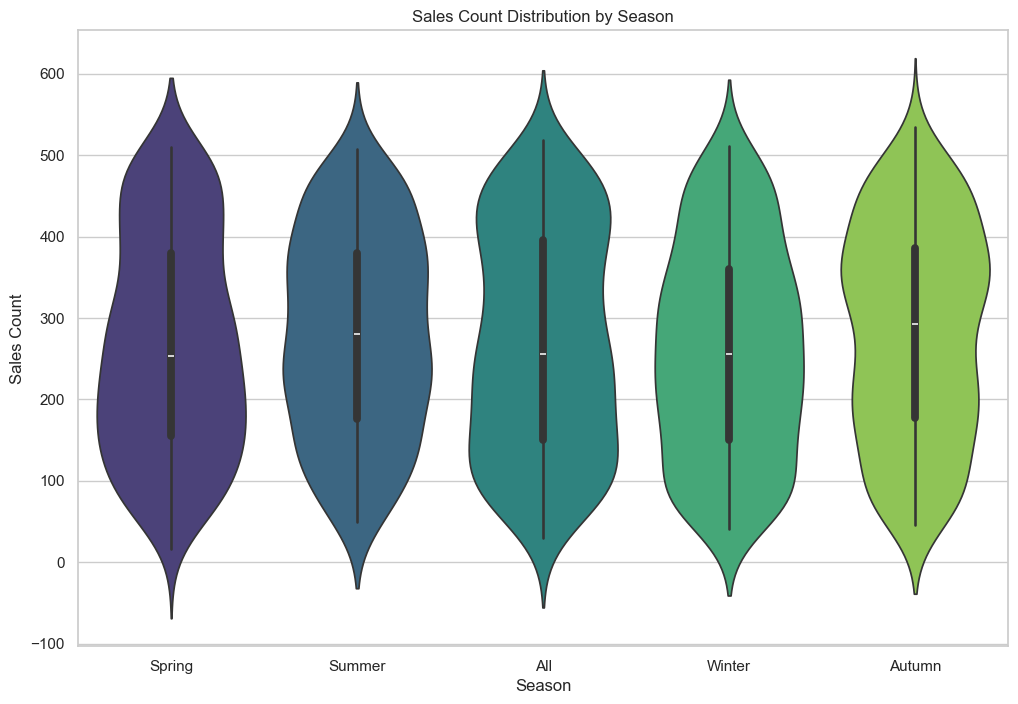

In [38]:

# Violin plot for sales_count by season
plt.figure(figsize=(12, 8))
sns.violinplot(x='season', y='sales_count', data=df, palette='viridis')
plt.title('Sales Count Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Sales Count')
plt.show()


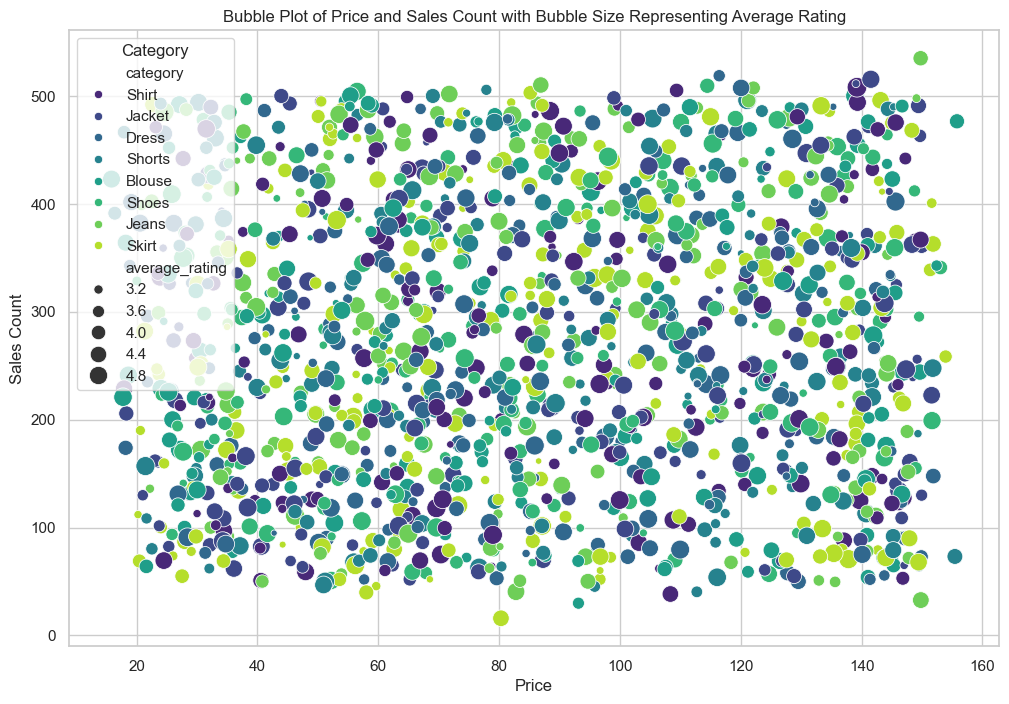

In [78]:

#  Bubble plot with price, sales_count, and average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='sales_count', size='average_rating', hue='category', data=df, palette='viridis', sizes=(20, 200))
plt.title('Bubble Plot of Price and Sales Count with Bubble Size Representing Average Rating')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.legend(title='Category')
plt.show()


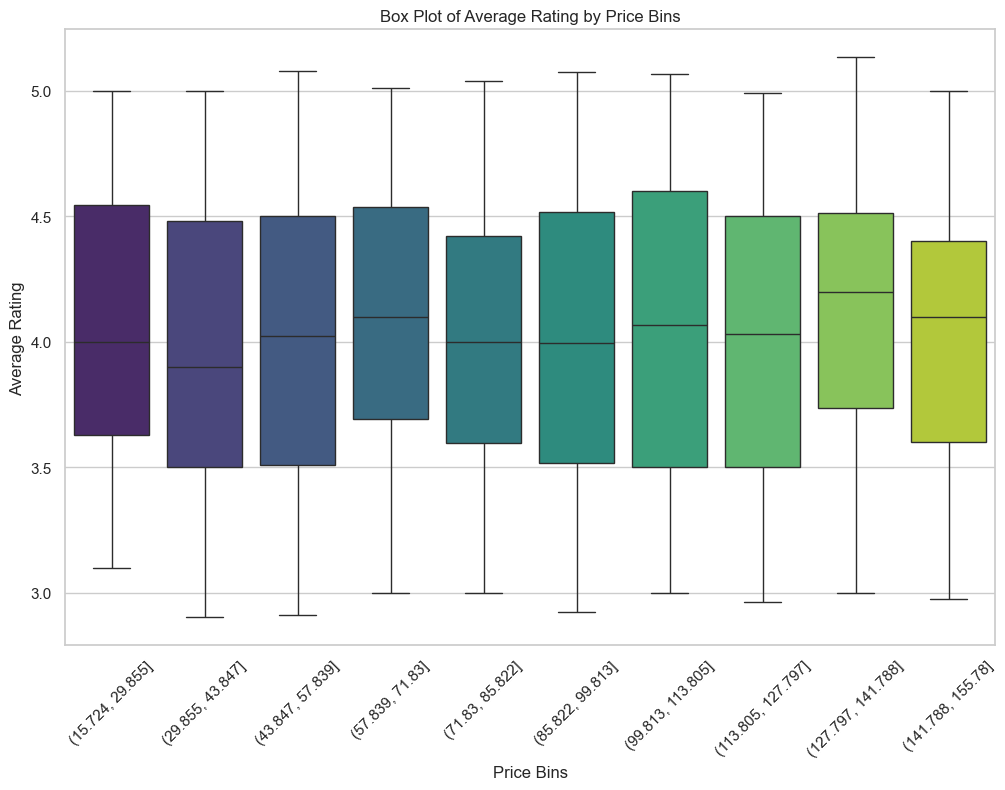

In [46]:
# Creating price bins
df['price_bins'] = pd.cut(df['price'], bins=10)

plt.figure(figsize=(12, 8))
sns.boxplot(x='price_bins', y='average_rating', data=df, palette='viridis')
plt.title('Box Plot of Average Rating by Price Bins')
plt.xlabel('Price Bins')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()



In [48]:
df.head()

product_id    product_name  gender category     pattern  color age_group  \
0        1001    Biker Jacket    Male    Shirt   Geometric  White     25-35   
1        1002  Business Shirt    Male   Jacket  Polka Dots  Beige     18-24   
2        1003     Wool Jacket  Female    Dress   Geometric  Brown     18-24   
3        1004    Summer Dress    Male   Shorts       Plain  White     25-35   
4        1005    Casual Jeans    Male    Shirt       Plain  Beige     35-45   

   season   price   material  ...  month_of_sale  year_of_sale  total_reviews  \
0  Spring   70.36  Synthetic  ...            1.0        2018.0          318.5   
1  Summer   91.59       Wool  ...            1.0        2018.0           87.5   
2     All  129.52       Wool  ...            1.0        2018.0          137.6   
3     All  116.01     Cotton  ...            1.0        2018.0          335.8   
4  Winter  125.48    Viscose  ...            1.0        2018.0          129.6   

   discount_percentage price_discount_ratio stock_availability  \
0                 0.20               56.288           0.039474   
1                 0.00               91.590           0.020202   
2                 0.05              123.044           0.078431   
3                 0.10              104.409           0.006881   
4                 0.00              125.480           0.050000   

  age_season_group  product_popularity  is_trend          price_bins  
0     25-35_Spring               604.5         0     (57.839, 71.83]  
1     18-24_Summer               594.5         1    (85.822, 99.813]  
2        18-24_All               251.6         0  (127.797, 141.788]  
3        25-35_All               941.8         1  (113.805, 127.797]  
4     35-45_Winter               334.6         0  (113.805, 127.797]  

[5 rows x 28 columns]

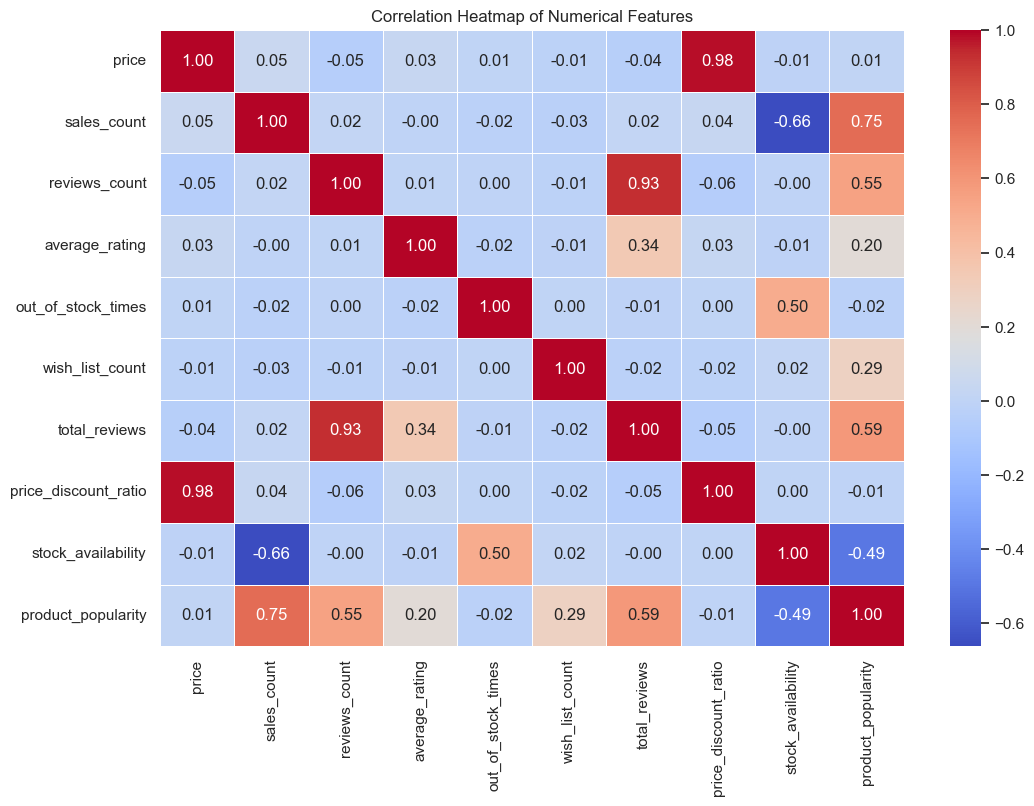

In [31]:


# Computing the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [19]:
# List of feature columns
feature_columns = [
    'gender', 'category', 'pattern', 'color', 'season', 'price', 'material',
    'sales_count', 'reviews_count', 'average_rating', 'out_of_stock_times',
    'wish_list_count', 'month_of_sale', 'year_of_sale', 'total_reviews',
    'price_discount_ratio', 'stock_availability', 'age_season_group', 'product_popularity'
]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[feature_columns], drop_first=True)

# Defining X and y
X = df_encoded
y = df['is_trend']

In [20]:

# Encoding categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardizing numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Initializing SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)

# Trainning the model
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Model Performance:
Accuracy: 0.93
Confusion Matrix:
 [[144  11]
 [ 10 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       155
           1       0.92      0.93      0.93       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



<Figure size 1000x700 with 0 Axes>

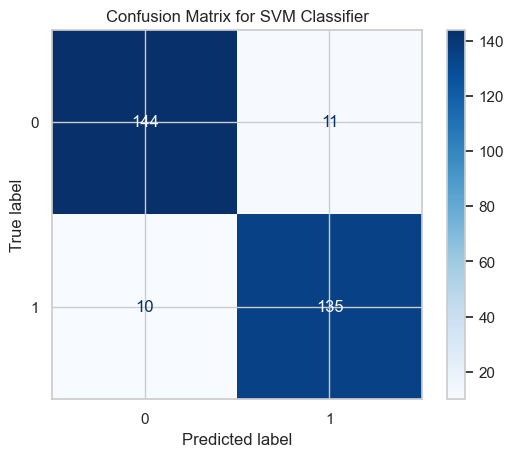

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

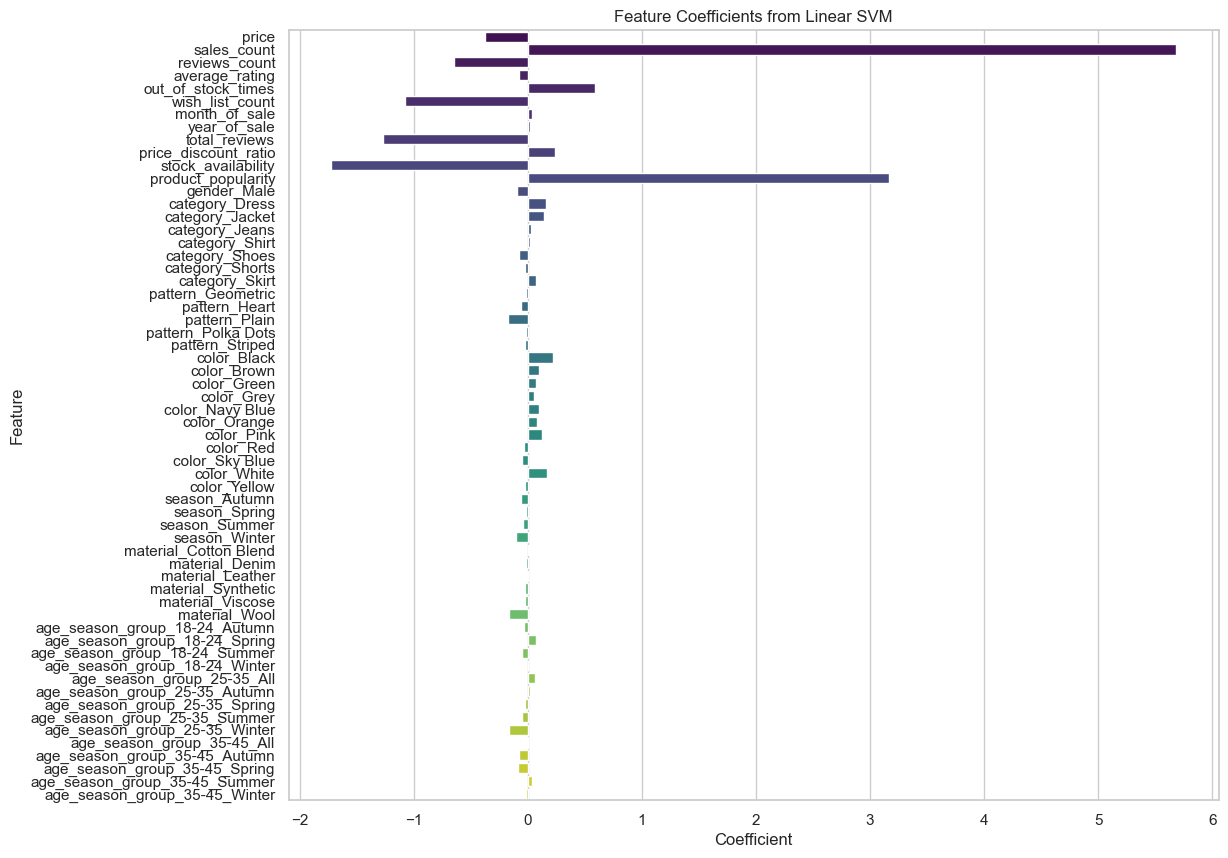

In [30]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Training a Linear SVM Model
model_svm = SVC(kernel='linear')  # Using linear kernel
model_svm.fit(X, y)

# Extracting coefficients
coefficients = model_svm.coef_.flatten()  # No need for toarray()
features = X.columns

# Plotting feature importances (coefficients)
plt.figure(figsize=(12, 10))
sns.barplot(x=coefficients, y=features, palette='viridis')
plt.title('Feature Coefficients from Linear SVM')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [23]:
# Initializing Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Trainning the model
extra_trees_model.fit(X_train, y_train)

# Making predictions
y_pred_extra_trees = extra_trees_model.predict(X_test)

# Evaluating the model
print("Extra Trees Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_extra_trees))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_extra_trees))
print("Classification Report:\n", classification_report(y_test, y_pred_extra_trees))


Extra Trees Classifier Performance:
Accuracy: 0.95
Confusion Matrix:
 [[148   7]
 [  8 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       155
           1       0.95      0.94      0.95       145

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



<Figure size 1000x700 with 0 Axes>

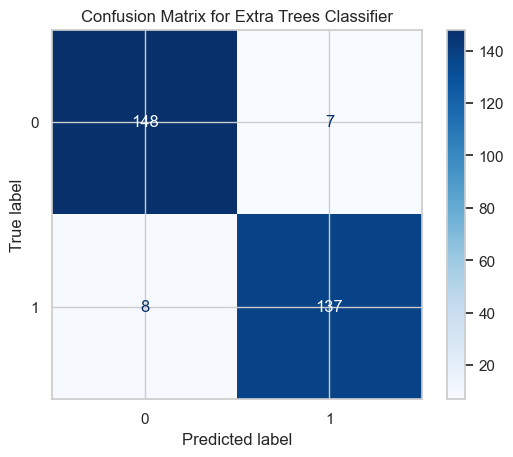

In [83]:
# Computing the confusion matrix
cm_extra_trees = confusion_matrix(y_test, y_pred_extra_trees, labels=extra_trees_model.classes_)

# Creating a ConfusionMatrixDisplay object
disp_extra_trees = ConfusionMatrixDisplay(confusion_matrix=cm_extra_trees, display_labels=extra_trees_model.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp_extra_trees.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.show()

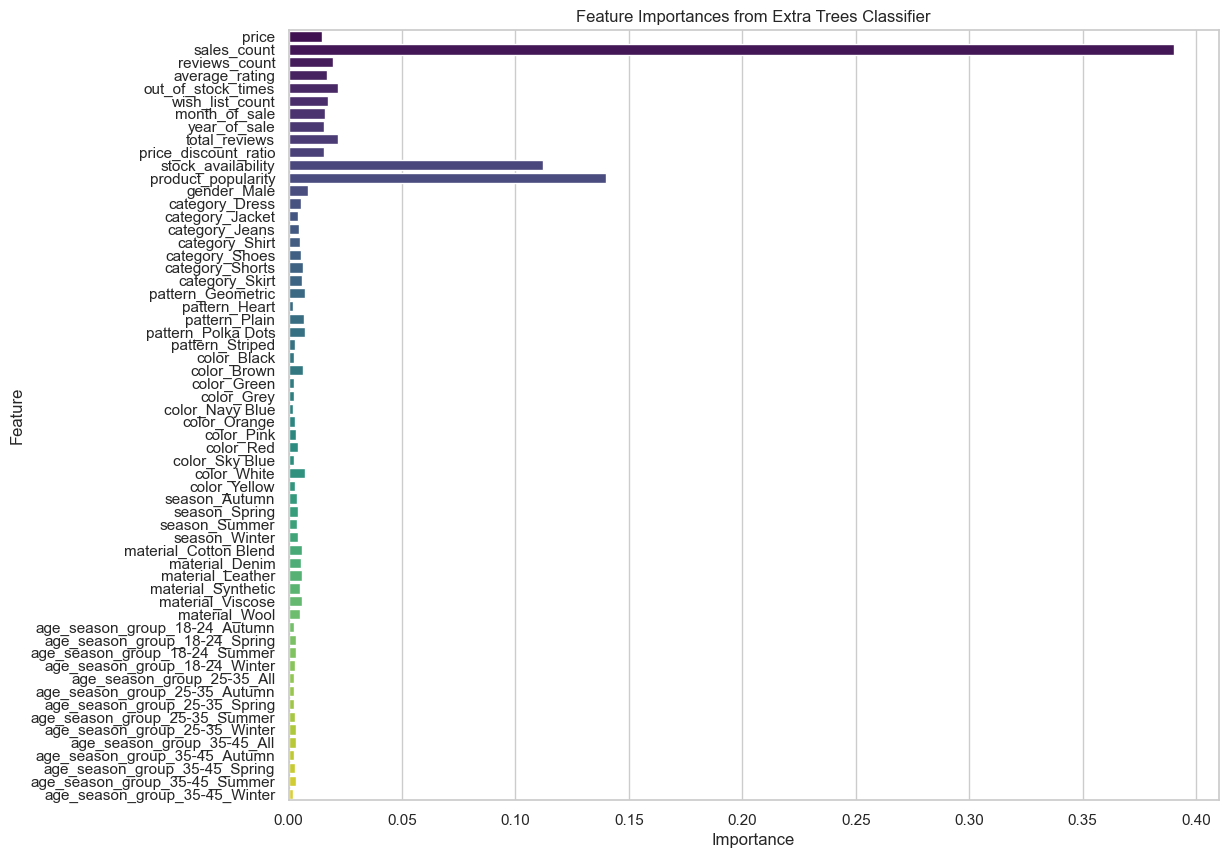

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

# Training  Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X, y)

# Getting feature importances
importances = model.feature_importances_
features = X.columns

# Plotting feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importances from Extra Trees Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
